In [44]:
import os
from typing import *
from pandas import DataFrame, Series, read_csv, concat, merge, get_dummies
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import ndarray
import numpy as np
import sys

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()


## Global variables
## To be removed in OOP implementation
LABELS = {
    '0-23_M' : 0,
    '0-23_F' : 1,
    '24-38_M': 2,
    '24-38_F': 3,
    '39-53_M': 4,
    '39-53_F': 5,
    '54-64_M': 6,  
    '54-64_F': 7
}
CROSS_VAL_FOLDS = 5
#FILEPATH_ASINHA = "D:\\Personal\\NEC Corporations Japan AICS Project\\2019-20 Work\\NEC Edge Project\\git@edge\\analytics-learning-platform\\Engineering\\ai_alp_project\\FullData10kRows.csv"
FILEPATH_ANKIT = "AI10kRows.csv"

## 1. Data Preparation

### 1.1 Importing from file path

In [45]:
data = read_csv(FILEPATH_ANKIT)
print("Data imported with Rows = {}, Columns = {}".format(data.shape[0], data.shape[1]))

Data imported with Rows = 10000, Columns = 15


**Selecting only relevant columns**
1. product_category
2. brand
3. age
4. gender

In [46]:
data.head(1)

,Unnamed: 0,consumer_id,age,gender,interest,product_record_id,product_name,brand,product_category,feature_type,level_1,level_2,level_3,rating_scale,rating_score
0,0,0#zuQEGGm4pcV6YV77EYdSyw,54-64,F,"{""Lifestyle::Fashion and Beauty"": 0.0674021810...",EiR6HtpXL6ufJDeU6B/Ufw,Jubilee Embroidered Mesh Peasant Top,Free People,Womens::Tops::Assorted,attribute,Design Details,Closure,Placket Closure Category,5,3


In [47]:
data = data[["age","gender","product_category","brand"]]

In [48]:
data.head()

,age,gender,product_category,brand
0,54-64,F,Womens::Tops::Assorted,Free People
1,54-64,F,Womens::Tops::Assorted,Podlily
2,54-64,M,Men::Bottoms::Shorts,Quality Durables Co.
3,24-38,F,Womens::Dresses::Assorted,Angelady
4,39-53,F,Womens::Dresses::Assorted,Laksmi


Finding the unique length of product categories

In [49]:
data.product_category.apply(lambda x : len(x.split("::"))).unique()

array([3, 4, 2], dtype=int64)

In [50]:
data.assign()

,age,gender,product_category,brand
0,54-64,F,Womens::Tops::Assorted,Free People
1,54-64,F,Womens::Tops::Assorted,Podlily
2,54-64,M,Men::Bottoms::Shorts,Quality Durables Co.
3,24-38,F,Womens::Dresses::Assorted,Angelady
4,39-53,F,Womens::Dresses::Assorted,Laksmi
5,39-53,F,Womens::Outerwear::Assorted,Misakia
6,39-53,F,Womens::Tops::Assorted,Soteer
7,39-53,F,Womens::Sweaters::Assorted,onlypuff
8,0-23,F,Womens::Tops::Activewear,Life is Good
9,54-64,F,Womens::Dresses::Assorted,Romwe


In [51]:
data = data.assign(split_len = data.product_category.apply(lambda x : len(x.split("::"))))
data.groupby("split_len").count()["age"]

split_len
2       2
3    9480
4     518
Name: age, dtype: int64

In [52]:
data.head()

,age,gender,product_category,brand,split_len
0,54-64,F,Womens::Tops::Assorted,Free People,3
1,54-64,F,Womens::Tops::Assorted,Podlily,3
2,54-64,M,Men::Bottoms::Shorts,Quality Durables Co.,3
3,24-38,F,Womens::Dresses::Assorted,Angelady,3
4,39-53,F,Womens::Dresses::Assorted,Laksmi,3


There seems to be mis-match between product_categories. Rather than having "NA" filled, lets see what we can do.

In [53]:
data[data.split_len == 2]

,age,gender,product_category,brand,split_len
1277,24-38,M,Big & Tall::Dress Shirts,Alimens & Gentle,2
7251,54-64,M,Big & Tall::Dress Shirts,Stacy Adams,2


There are just 2, which are for Big & Tall, and that go with Males.
Ideally we should convert them with the gender as the product_category1

Further more, as we do not have any other segment in men which says, Dress: Shirts, we will have this as
**Men::Dress Shirts::Assorted**

Assorted as being a general category (from business perspective)

In [54]:
data.loc[[1277,7251],"product_category"] = "Men::Dress Shirts::Assorted"

In [55]:
data[data.split_len == 2]

,age,gender,product_category,brand,split_len
1277,24-38,M,Men::Dress Shirts::Assorted,Alimens & Gentle,2
7251,54-64,M,Men::Dress Shirts::Assorted,Stacy Adams,2


**Working on product_category where split_len == 4**

In [56]:
data[data.split_len == 4].head()

,age,gender,product_category,brand,split_len
31,54-64,F,Womens::Pants::Jeans::Jeggings,Genie,4
40,54-64,F,Womens::Pants::Jeans::Assorted,Lee,4
85,54-64,F,Womens::Pants::Jeans::Assorted,Jag Jeans,4
90,39-53,F,Womens::Pants::Jeans::Assorted,Vibrant,4
94,39-53,F,Womens::Pants::Jeans::Plus Size,Silver Jeans Co.,4


In [57]:
data[data.split_len == 4]["gender"].unique()

array(['F'], dtype=object)

**It seems that Womens::Pants::Jeans is the unique element here, lets check**

In [58]:
data[data.split_len == 4]["product_category"].apply(lambda x : "::".join(x.split("::")[:3])).unique()

array(['Womens::Pants::Jeans'], dtype=object)

**Indeed, Women::Pants::Jeans is the unique element here**
Strategy, what we would do is following
1. We would make this as Women::Jeans::<4th category> so that we have information pertaining to jeans for women

*Note*
Let's just check what "Jeans" category in Men section

In [59]:
data[data.product_category.apply(lambda x: x.split("::")[0]) == "Men"].head()

,age,gender,product_category,brand,split_len
2,54-64,M,Men::Bottoms::Shorts,Quality Durables Co.,3
14,39-53,M,Men::Bottoms::Jeans,Southpole,3
66,24-38,M,Men::Outerwear::Coats & Jackets,Simbama,3
78,24-38,M,Men::Bottoms::Dress Pants,IZOD,3
102,39-53,M,Men::Outerwear::Coats & Jackets,Wantdo,3


Some observations
1. Obviously, when we have "Men" in product category, we will have the gender as Male. This means that the classfier would have almost 100% correlation between "Gender" feature and "Product category 1" feature
2. However, we would like to have segmentation between "Age_Gender" class, so we would like to keep this.
3. It seems that product_cateogories and their association with respective classes would "intuitively" work better when we have a Decision Tree kind of model, because if you look at the product categories, we can "intuitively" say that it belongs to a certain segment.
4. DecisionTrees / RandomForest seems to be a good choice, but we will see

As we strategized earlier, we will gave the Women::Jeans category changed as following
**Women::Jeans::<4th category>**

In [60]:
women_jeans_data = data[data.split_len == 4]["product_category"].apply(lambda x : "::".join([x.split("::")[0],x.split("::")[2],x.split("::")[3]]))
data.loc[data.split_len == 4,"product_category"] = women_jeans_data

In [61]:
data[data.split_len == 4]["product_category"].unique()

array(['Womens::Jeans::Jeggings', 'Womens::Jeans::Assorted',
       'Womens::Jeans::Plus Size', 'Womens::Jeans::Petites'], dtype=object)

Lets check the distribution now

In [62]:
data = data.assign(split_len = data.product_category.apply(lambda x : len(x.split("::"))))
data.groupby("split_len").count()["age"]

split_len
3    10000
Name: age, dtype: int64

**Now we have all product categories in 3 ("::") lengths**

## 2. Feature Preparation

### 2.1 Encode product_category

#### IMPORTANT NOTE ####
Right now we are just using get_dummies from Pandas, however in real life, we will using sklearn's One-HotEncoder class, and have pickle dump of it so that we can have a consistent encoding

In [63]:
data["product_category"].isnull().sum()

0

In [64]:
split_df = data["product_category"].str.split("::", expand=True).fillna("N/A")
split_df.columns = ["product_category_1","product_category_2","product_category_3"]
split_df.head()

,product_category_1,product_category_2,product_category_3
0,Womens,Tops,Assorted
1,Womens,Tops,Assorted
2,Men,Bottoms,Shorts
3,Womens,Dresses,Assorted
4,Womens,Dresses,Assorted


In [65]:
X_prod_cat = get_dummies(split_df,drop_first=True) ## to reduce feature space, why not drop first #
X_prod_cat.head()

,product_category_1_Womens,product_category_2_Dress Shirts,product_category_2_Dresses,product_category_2_Jeans,product_category_2_Outerwear,product_category_2_Pants,product_category_2_Shorts,product_category_2_Skirts,product_category_2_Suits & Tuxedos,product_category_2_Sweaters,...,product_category_3_Tank Tops & T-Shirts,product_category_3_Tuxedo Shirts,product_category_3_Various,product_category_3_Vests,product_category_3_Wear to Work,product_category_3_cardigans,product_category_3_coats & jackets,product_category_3_sweatshirts,product_category_3_tanks & camis,product_category_3_vests
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Encode Brands

In [66]:
X_brand = get_dummies(data["brand"],drop_first=True) ## Why not drop first to reduce feature space ##
X_brand.head()

,#followme,1 Madison,1.State,12 Ami,12.99 Prime Tees,1822 DENIM,2020AVE,2LUV,2ND DATE,2XU,...,spoear,taigee,uxcell,vadim,virblatt,vs by spursgrl,wanture,yangelo,youvimi,yubinyu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3 Combine brands and product_category

In [67]:
X = concat([X_prod_cat, X_brand], axis=1)
print("Shape of feature set", X.shape)

Shape of feature set (10000, 2782)


### 2.4 Create Label vector

In [68]:
#Y = data[['age', 'gender']].apply(lambda x: LABELS["_".join(x)], axis=1)
Y = data[['age', 'gender']].apply(lambda x: "_".join(x), axis=1)
print("Shape of label vector", Y.shape)

Shape of label vector (10000,)


## 3. PCA decomposition of feature set

### 3.1 Plot cummulative variance vs Components 

In [78]:
import pandas as pd

In [87]:
A = pd.DataFrame({"Null values" : X.isnull().sum()})
A.head()

,Null values
product_category_1_Womens,0
product_category_2_Dress Shirts,0
product_category_2_Dresses,0
product_category_2_Jeans,0
product_category_2_Outerwear,0


Ref : https://etav.github.io/python/scikit_pca.html

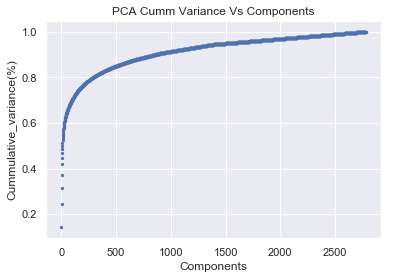

Cumulative Variance to study [0.14226129 0.24281997 0.31558913 ... 1.         1.         1.        ]


In [95]:
pca = PCA(random_state=100)
pca.fit(X)
cum_var = pca.explained_variance_ratio_.cumsum()
principal_component_ix = [i+1 for i in range(len(cum_var))]
plt.title("Component Vs Cummalative Variance Ratio")
plt.scatter(principal_component_ix,cum_var,s=5)
plt.xlabel("Components")
plt.ylabel("Cummulative_variance(%)")
plt.title("PCA Cumm Variance Vs Components")
plt.show()

print("Cumulative Variance to study {}".format(cum_var))

#sns.lineplot(x="Components", y="Cummulative_variance%", data=DataFrame({"Components": principal_component_ix, "Cummulative_variance%": cum_var}))

In [98]:
cum_var_df = pd.DataFrame({"Cum_var": cum_var})
cum_var_df.to_csv("Cum_var.csv")

We have 90% variance explained by **815** components

**Idea**
1. We should have a pipeline which could would on 90%/95% variance with other model tuning paramters, but we can try that later.

As of now going with 90% variance aka 815 parameters

## 3.2 Encode using PCA

In [99]:
pca_clf = PCA(n_components=815, svd_solver="randomized", random_state=100)
reduced_x = pca_clf.fit_transform(X)
X = DataFrame(reduced_x, columns=[f'X_{i}' for i in range(reduced_x.shape[1])])
print("PCA Reduced data set shape =",X.shape)
X.head()

PCA Reduced data set shape = (10000, 815)


,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_805,X_806,X_807,X_808,X_809,X_810,X_811,X_812,X_813,X_814
0,-0.482851,0.765744,0.157949,0.002392,0.023774,-0.038384,-0.087292,0.082749,-0.032191,-0.013024,...,-0.000598,-0.000158,0.001393,0.000230,-0.000120,-0.000128,-0.000730,0.000216,0.000743,-0.000307
1,-0.480685,0.760461,0.157525,-0.003451,0.025787,-0.036583,-0.083043,0.078961,-0.027839,-0.008227,...,0.000707,-0.002985,-0.000620,0.002789,-0.002686,0.001664,-0.003611,0.001045,-0.002336,0.005671
2,0.592822,-0.011609,-0.366305,-0.173658,0.212608,0.795445,-0.288967,-0.149569,0.049697,0.033779,...,0.003900,-0.008803,0.006154,0.000488,-0.005329,0.002155,-0.006231,0.000532,0.003961,-0.004513
3,-0.675202,-0.609552,0.009616,-0.059817,0.203943,-0.028597,-0.040223,-0.040651,-0.062751,-0.001935,...,-0.003463,-0.001474,0.000731,-0.005775,0.000846,-0.003269,0.005386,-0.001769,0.003612,-0.000988
4,-0.676700,-0.609025,0.009952,-0.059438,0.204349,-0.029188,-0.041607,-0.040178,-0.064028,-0.001761,...,-0.000495,-0.000124,0.000126,-0.000995,0.001998,0.000514,-0.000133,-0.000094,-0.000275,-0.000309


## 4. Training and Measurement

#### 4.1 Train/Test split ####
1. Do not use StratifiedKFold, instead use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with stratify option. Build a 80/20 split for training/validation respectively, use some static random_state so that we could reproduce the results when we share the notebook.
2. Later on we will use StratifiedKFold on the train set when we use GridSearch.

In [ ]:
np.vstack()

In [ ]:
(DataFrame(np.vstack((np.arange(0,Y.shape[0],1),Y)).T,columns=["idx","segment"]).groupby("segment").count()["idx"] / Y.shape[0])*100

In [52]:
print("Distribution of data in original data set")
(DataFrame(np.vstack((np.arange(0,Y.shape[0],1),Y)).T,columns=["idx","segment"]).groupby("segment").count()["idx"] / Y.shape[0])*100

Distribution of data in original data set


segment
0-23_F      1.99
0-23_M      0.17
24-38_F    14.14
24-38_M     0.97
39-53_F    43.84
39-53_M     2.42
54-64_F    33.60
54-64_M     2.87
Name: idx, dtype: float64

In [53]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, stratify=Y)
print("Shape of Training Features::", train_x.shape)
print("Shape of Training Labels::", train_y.shape)

Shape of Training Features:: (8000, 815)
Shape of Training Labels:: (8000,)


In [54]:
print("Distribution of segments in train data set")
(DataFrame(np.vstack((np.arange(0,train_y.shape[0],1),train_y)).T,columns=["idx","segment"]).groupby("segment").count()["idx"] / train_y.shape[0])*100

Distribution of segments in train data set


segment
0-23_F      1.9875
0-23_M      0.1750
24-38_F    14.1375
24-38_M     0.9625
39-53_F    43.8375
39-53_M     2.4250
54-64_F    33.6000
54-64_M     2.8750
Name: idx, dtype: float64

In [55]:
print("\n Distribution of segments in test data set")
(DataFrame(np.vstack((np.arange(0,test_y.shape[0],1),test_y)).T,columns=["idx","segment"]).groupby("segment").count()["idx"] / test_y.shape[0])*100


 Distribution of segments in test data set


segment
0-23_F      2.00
0-23_M      0.15
24-38_F    14.15
24-38_M     1.00
39-53_F    43.85
39-53_M     2.40
54-64_F    33.60
54-64_M     2.85
Name: idx, dtype: float64

#### 4.2 Build K Fold sets 
1. Build 5 Cross Cross validation using [sklearn.model_selection.StatifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).

In [56]:
skf = StratifiedKFold(n_splits=CROSS_VAL_FOLDS, random_state=100, shuffle=True)
skf

StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [57]:
def calculate_confusion_matrix(y_pred, y_true):
    accuracies = []
    df = DataFrame(confusion_matrix(y_true, y_pred))
    for i in range(8):
        actual = df.iloc[i, :].sum()
        correct_pred = df.iloc[i, i]
        accuracies.append(correct_pred/actual)
    return df, accuracies

#### 4.3 (Default Logistic Regression)
1. By default LR will choose L2 regularization. (Make sure you increase max_iter variable to around 100,000).
2. Check avg accuracy on train set and validation set
3. Build a proper confusion matrix for with class-wise accuracy details. DO NOT USE multilabel_confusion_matrix. Use standard confusion_matrix and build a dataframe out of it, and provide a row-wise segement based accuracy. Probably you can make a function for this.

In [58]:
def get_segment_accuracies(y_pred, y_true):
    accuracies = []
    df = DataFrame(confusion_matrix(y_true, y_pred))
    for i in range(8):
        actual = df.iloc[i, :].sum()
        correct_pred = df.iloc[i, i]
        accuracies.append(correct_pred/actual)
    return df, accuracies

In [59]:
lr_clf = LogisticRegression(multi_class="multinomial"
                            , class_weight="balanced"
                            , solver="lbfgs"
                            , max_iter=100000
                            , random_state=100)
sum_test_score, sum_train_score = 0, 0
for train_ix, test_ix in skf.split(train_x,train_y):
    train_x_k, test_x_k = X.iloc[train_ix], X.iloc[test_ix]
    train_y_k, test_y_k = Y.iloc[train_ix], Y.iloc[test_ix]

    #  1. fit the logit curve on training data
    lr_clf.fit(train_x_k, train_y_k)
    
    # 2. Calculate accuracy scores in each fold
    sum_test_score += accuracy_score(test_y_k, lr_clf.predict(test_x_k))
    sum_train_score += accuracy_score(train_y_k, lr_clf.predict(train_x_k))

print("Average Training Accuracy = ", sum_train_score/CROSS_VAL_FOLDS)
print("Average Testing Accuracy = ", sum_test_score/CROSS_VAL_FOLDS)

Average Training Accuracy =  0.442030411597936
Average Testing Accuracy =  0.3037603851409905


In [1]:
pred_y = lr_clf.predict(test_x)
cm, accuracies = get_segment_accuracies(test_y, pred_y)
print("==========================================")
print("Confusion Matrix")
print("==========================================")
print(cm)
print("==========================================")
i = 0
for acc in accuracies:
    print("Accuracy of Segment {} = {:1f}".format(list(LABELS.keys())[i], acc))
    i += 1

NameError: name 'lr_clf' is not defined

#### 4.4 (Logistic Regression with L1 Regularization - LASSO)
1. Use ```penalty="l1"``` as the option for LogisticRegression
2. Do a 5-Cross Cross validation. See below for example
      - Parameter ranges given below 
  
      ``` param_l1_lr = { "C" = np.linspace(0.01,1.0,50) }```
  
      - Example
      ```
      lasso_model = LogisticRegression(penalty='l1')
      fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
      params = {"C" : np.linspace(0.01,1.0,50)}
      grid = GridSearchCV(estimator=lasso_model,
                          param_grid=params,
                          scoring="accuracy",
                          cv=fold,
                          verbose=1,
                          return_train_score=True,
                          n_jobs=-1)
      grid.fit(X_train_churn_detect_pca,Y_train_churn_detect)
      ```
3. Build a proper train_accuracy & test_accuracy graph Vs C value
4. Check what the graph is saying and what does the ```grid.best_params_``` is giving.
5. Select an appropriate parameter
6. Build a final LR object with ```LogisticRegression(penalty="l1", C=<selected_param>)``` and check training and validation avg accuracy. Also build the confusion_matrix and ```segment``` wise accuracy values.

In [61]:
# grid search is not converging for even a single fit
# Multinomail LR with L1 regularization is supported only by 'saga' solver
# training is taking a lot of time


##########################################################
#param_l1_lr = {"C" : np.linspace(0.01,1.0,50)}
#lr_clf_l1 = LogisticRegression(multi_class="multinomial"
#                            , class_weight="balanced"
#                            , solver="saga"
#                            , max_iter=100000
#                            , random_state=100
#                            , penalty="l1")
#grid_search_clf_l1 = GridSearchCV(estimator=lr_clf_l1  
#                              , param_grid=param_l1_lr
#                              , scoring='accuracy'
#                              , verbose=1
#                              , cv=CROSS_VAL_FOLDS
#                              , n_jobs=-1)
#print("Starting Grid search..........")
#grid_search_clf_l1.fit(train_x, train_y)
#print("Grid Search completed!!!!!")

#### 4.4 (Logistic Regression with L2 regularization - RIDGE)
1. Use similar steps described above for L2 also. Parameter tuning information provided below
     
     ``` param_l2_lr = { "C" = np.linspace(0.01,1.0,50) }```

In [62]:
param_l2_lr = {"C" : np.linspace(0.01,1.0,50)}
lr_clf_l2 = LogisticRegression(multi_class="multinomial"
                            , class_weight="balanced"
                            , solver="lbfgs"
                            , max_iter=100000
                            , random_state=100
                            , penalty="l2")
grid_search_clf_l2 = GridSearchCV(estimator=lr_clf_l2  
                              , param_grid=param_l2_lr
                              , scoring='accuracy'
                              , verbose=1
                              , cv=CROSS_VAL_FOLDS
                              , n_jobs=-1)
print("Starting Grid search..........")
grid_search_clf_l2.fit(train_x, train_y)
print("Grid Search completed!!!!!")

Starting Grid search..........
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 10.9min finished


Grid Search completed!!!!!


AttributeError: module 'seaborn' has no attribute 'scatterplot'

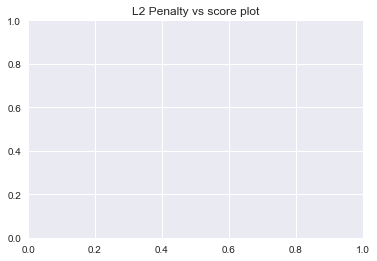

In [66]:
mean_train_score = grid_search_clf_l2.cv_results_["mean_train_score"]
mean_test_score = grid_search_clf_l2.cv_results_["mean_test_score"]
C_val = [p["C"] for p in grid_search_clf_l2.cv_results_["params"]]
df = DataFrame({"train_score":mean_train_score, "test_score": mean_test_score, "C": C_val})
df = df.melt('C', var_name='cols',  value_name='vals')
plt.title("L2 Penalty vs score plot")
sns.scatterplot(x="C", y="vals", hue='cols', data=df)
plt.xlabel("C")
plt.ylabel("Score")
plt.show()

<p style="color:red">There seems to be some problem with my seaborn package, I am working on it. For the time being, plotting graph with native matplotlib</p>

In [70]:
print("Best Value of C chosen by GS = ", grid_search_clf_l2.best_params_)

Best Value of C chosen by GS =  {'C': 1.0}


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


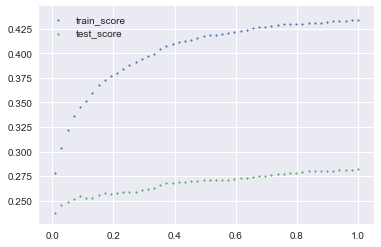

In [77]:
plt.scatter(grid_search_clf_l2.param_grid["C"],grid_search_clf_l2.cv_results_["mean_train_score"],s=3)
plt.scatter(grid_search_clf_l2.param_grid["C"],grid_search_clf_l2.cv_results_["mean_test_score"],s=3)
plt.legend(["train_score","test_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Multinomial - LBFGS - L2 Penalty - Cross Validation")
plt.show()

In [87]:
param_l2_lr = {"C" : np.linspace(0.01,1.0,50)}
lr_clf_l2 = LogisticRegression(multi_class="ovr"
                            , class_weight="balanced"
                            , solver="liblinear"               # liblinear will limit to 1 thread, I think we should use "saga" because it supports L1 penalty also
                            , max_iter=100000
                            , random_state=100
                            , penalty="l2")
grid_search_clf_l2 = GridSearchCV(estimator=lr_clf_l2  
                              , param_grid=param_l2_lr
                              , scoring='accuracy'
                              , verbose=1
                              , cv=CROSS_VAL_FOLDS
                              , n_jobs=-1)
print("Starting Grid search..........")
grid_search_clf_l2.fit(train_x, train_y)
print("Grid Search completed!!!!!")

Starting Grid search..........
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 36.6min finished


Grid Search completed!!!!!


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


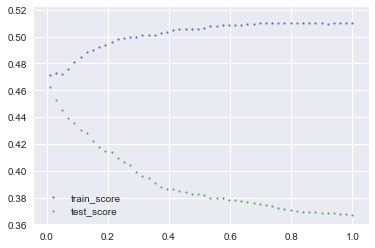

In [88]:
plt.scatter(grid_search_clf_l2.param_grid["C"],grid_search_clf_l2.cv_results_["mean_train_score"],s=3)
plt.scatter(grid_search_clf_l2.param_grid["C"],grid_search_clf_l2.cv_results_["mean_test_score"],s=3)
plt.legend(["train_score","test_score"])
plt.show()

In [89]:
print(grid_search_clf_l2.best_score_)
print(grid_search_clf_l2.best_params_)

0.4625
{'C': 0.01}


In [90]:
lr_clf_regularised_l2 = LogisticRegression(multi_class="ovr"
                                        , class_weight="balanced"
                                        , solver="liblinear"
                                        , max_iter=100000
                                        , random_state=100
                                        , C=0.01)
sum_test_score_l2_reg, sum_train_score_l2_reg = 0, 0
for train_ix, test_ix in skf.split(train_x,train_y):
    train_x_k, test_x_k = X.iloc[train_ix], X.iloc[test_ix]
    train_y_k, test_y_k = Y.iloc[train_ix], Y.iloc[test_ix]

    #  1. fit the logit curve on training data
    lr_clf_regularised_l2.fit(train_x_k, train_y_k)
    
    # 2. Calculate accuracy scores in each fold
    sum_test_score_l2_reg += accuracy_score(test_y_k, lr_clf_regularised_l2.predict(test_x_k))
    sum_train_score_l2_reg += accuracy_score(train_y_k, lr_clf_regularised_l2.predict(train_x_k))

print("Average Training Accuracy = ", sum_train_score_l2_reg/CROSS_VAL_FOLDS)
print("Average Testing Accuracy = ", sum_test_score_l2_reg/CROSS_VAL_FOLDS)

Average Training Accuracy =  0.47190700740749686
Average Testing Accuracy =  0.4605107891196882


In [122]:
pred_y = lr_clf_regularised_l2.predict(test_x)

In [123]:
cm_pd = DataFrame(confusion_matrix(test_y,pred_y,labels=test_y.unique()),
             index = [x + "_Actual" for x in test_y.unique()],
             columns = [x + "_Pred" for x in test_y.unique()])
cm_pd = cm_pd.assign(Total = [cm_pd.iloc[x,:].sum() for x in range(0,len(cm_pd.columns),1)])
cm_pd = cm_pd.assign(Accuracy = [cm_pd.iloc[x,x] / cm_pd.iloc[x,0:len(cm_pd.columns)-1].sum() for x in range(0,len(cm_pd.columns)-1,1)])
cm_pd

,54-64_F_Pred,24-38_F_Pred,39-53_F_Pred,54-64_M_Pred,24-38_M_Pred,39-53_M_Pred,0-23_F_Pred,0-23_M_Pred,Total,Accuracy
54-64_F_Actual,50,0,622,0,0,0,0,0,672,0.074405
24-38_F_Actual,16,0,267,0,0,0,0,0,283,0.000000
39-53_F_Actual,42,0,834,0,0,0,0,1,877,0.950969
54-64_M_Actual,0,0,0,39,3,10,0,5,57,0.684211
24-38_M_Actual,0,0,0,13,1,5,0,1,20,0.050000
39-53_M_Actual,0,0,0,29,0,18,0,1,48,0.375000
0-23_F_Actual,1,0,39,0,0,0,0,0,40,0.000000
0-23_M_Actual,0,0,0,1,0,0,0,2,3,0.666667


In [114]:
accuracy_score(test_y,pred_y)

0.472

Strategy to be followed now onwards
1. LR (using L1 regularization)
2. Build DT model
3. Build RF model

Tree based model may do much better over here.
Subsequently, we can also use AdaBoost over DT model, and "intuitively" we may have a good model.